In [59]:
your_name = "Marta Gonzalez"  
your_uid = "115350793"
received_help_from = "If you have received help from others, list them here."

# Assignment 7

For this assignment, you will be using the Breast Cancer Wisconsin (Diagnostic) Database to create a classifier that can help diagnose patients. **For this assignment, please import necessary packages as you need.** For a good programming style, you should put all import command in the following cell. However, you may also import in the cell where you need to call the API. 

In [60]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from matplotlib import pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

First, read through the description of the dataset (below).

In [61]:
cancer = load_breast_cancer()

# Uncomment the following line to print the data set description
# print(cancer.DESCR) 

The object returned by `load_breast_cancer()` is a scikit-learn Bunch object, which is similar to a dictionary. You can view the keys stored in the data set via the following commands.

In [62]:
print(cancer.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [63]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

You may then view the data (the $X$) by specifying the `data` key and view the outcome/label (the $Y$) by specifying `target`.

In [64]:
cancer['data']

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [65]:
cancer['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

# Exercise 1 (1 pt)
Examine the dimension of the data set, how many dimension does the cancer data set has? You should get the answer from the `cancer` object rather than hard code the answer.  

In [66]:
def get_dimension():
    # YOUR CODE HERE
    n_dimension = len(cancer['feature_names'])
    return n_dimension

In [67]:
# Test whether get_dimension() is implemented correctly.
assert get_dimension() == 30

To prepare the data in the format that scikit-learn requires for classification. That is, we need to prepare the X and the y.

In [68]:
X = cancer['data']
y = cancer['target']

## Exercise 2 (1 pt)
We need to have two datasets, training data and testing data, in order to run the machine learning algorithm. There are used for different purposes. The training data is used to train the machine learning algorithm to learn the decision workflow and produce results. The testing data is to evaluate the performance of the machine learning model.

Using `train_test_split`, split X and y into training and test sets (X_train, X_test, y_train, and y_test).

Set the random number generator state to 0 using `random_state=0` to make sure your results remain the same across different run!

This function should return a tuple of length 4: (X_train, X_test, y_train, y_test), where

X_train has shape (426, 30)
X_test has shape (143, 30)
y_train has shape (426,)
y_test has shape (143,)

In [69]:
def split_data(X, y):
    
    # YOUR CODE HERE
    (X_train, X_test, y_train, y_test) = train_test_split(X,y)   
    return X_train, X_test, y_train, y_test

In [70]:
# Test whether split_data() is implemented correctly.
assert split_data(X, y)[0].shape == (426, 30), "Please check the shape of X_train."
assert split_data(X, y)[1].shape == (143, 30), "Please check the shape of X_test."
assert split_data(X, y)[2].shape == (426,), "Please check the shape of y_train."
assert split_data(X, y)[3].shape == (143,), "Please check the shape of y_test."

## Exercise 3 (1 pt)

In this exercise, please create a KNeighborsClassifier and fit it using the training data, and the specified $k$ value. your function , fit a k-nearest neighbors (knn) classifier with `X_train`, `y_train` and using k nearest neighbor (`n_neighbors = k`).

*This function should return a * `sklearn.neighbors.classification.KNeighborsClassifier`.

In [71]:
def fitted_knn(k):
    X_train, X_test, y_train, y_test = split_data(X, y)
    # YOUR CODE HERE
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    return knn

In [72]:
# Test whether fitted_knn() is implemented correctly.
# For testing purposes, we predict the class label using the max/mean/min value for each feature.
clf = fitted_knn(k=3)
X_train, X_test, y_train, y_test = split_data(X, y)
x1 = X_train.max(axis=0)
x2 = X_train.mean(axis=0)
x3 = X_train.min(axis=0)
assert clf.predict([x1])[0] == 0
assert clf.predict([x2])[0] == 1
assert clf.predict([x3])[0] == 1

You can use the `score` function to evaluate the accuracy of a classifier. That is:

In [73]:
clf = fitted_knn(3)
print(clf.score(X_test, y_test))

0.993006993006993


# Exercise 4 (1 pt)
In this exercise, let's determine the best $k$ for classifying the cancer type. To do this, we need to enumerate a series of k, and obtain the performance of the kNN classifier for each k. Complete the following code to plot the performance of the classifiers over k.

In [74]:
k_range = list(range(1, 25, 2))
scores = []

for k in k_range:
    # YOUR CODE HERE
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

In [75]:
assert len(scores) == 12
assert abs(scores[1] - 0.9230769230769231) < 1e-6 
assert abs(scores[2] - 0.9370629370629371) < 1e-6 
assert abs(scores[5] - 0.958041958041958) < 1e-6 

AssertionError: 

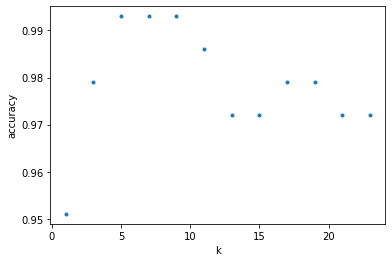

In [76]:
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.plot(k_range, scores, '.')

Based on the plot, what $k$ yield the best performance? (You don't need to answer this question.)

## Bonus Exercise  (0.5 points)
Note that the accuracy is only one measurement for evaluating the performance. There are other evaluation metrics as well. In the bonus exercise, please calculate the **precision** and **recall** of the classifier. These two metrics are originally proposed to evaluate information retrieval tasks. However, the classifier we are building can be seen as retrieving malignant cases among the patients. Think about how you would define "relevant documents" and "retrieved documents" and program a short script to calculate the **precision** and **recall**.

In [ ]:
def precision_recall(k):
    clf = fitted_knn(k)
    # YOUR CODE HERE
    raise NotImplementedError()
    return precision, recall

In [ ]:
precision, recall = precision_recall(k=1)
assert abs(precision - 0.9239130434782609) < 1e-6
assert abs(recall - 0.9444444444444444) < 1e-6

precision, recall = precision_recall(k=3)
assert abs(precision - 0.9438202247191011) < 1e-6
assert abs(recall - 0.9333333333333333) < 1e-6

precision, recall = precision_recall(k=5)
assert abs(precision - 0.9550561797752809) < 1e-6
assert abs(recall - 0.9444444444444444) < 1e-6